<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Rede_neural_arquitetura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Importando as bibliotecas de interesse

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.metrics import MeanRelativeError
from keras.initializers import Ones, glorot_uniform, he_normal

In [33]:
#Carregando o dataset e separando em teste e treino
df = pd.read_csv('data_cov.csv')
y = df['cov']
x = df.drop('cov', axis = 1)

x_treino, x_teste = x[0:30], x[30:]
#print(x_treino)
#print(x_teste)
y_treino, y_teste = y[0:30], y[30:]

In [34]:
#Rede neural


def rede_neural(x_treino, y_treino, x_teste, y_teste, a):
  # Adicionar a camadas ocultas com 10 nós cada, de acordo com Su
  modelo = Sequential()
  for _ in range(a):
    modelo.add(Dense(units=10, activation='relu', kernel_initializer = glorot_uniform(seed = 1), input_dim=x_treino.shape[1]))

  modelo.add(Dense(units=1, activation='linear'))

  # Treinando a rede neural:

  modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
  resultado = modelo.fit(x_treino, y_treino, epochs=350, batch_size=32, validation_data=(x_teste, y_teste))
  #Pegando os valores do erro
  loss = resultado.history['loss'][349]; val_loss = resultado.history['val_loss'][349]
  mae = resultado.history['mae'][349]; val_mae = resultado.history['val_mae'][349]
  y_pred = modelo.predict(x_treino)
  y_pred = pd.DataFrame(y_pred)


  erro_relativo = 0
  for i in range(len(y_treino)):
    erro_relativo += (np.abs(y_treino[i]- y_pred[0][i])/y_treino[i])
  erro_relativo = (erro_relativo/len(y_treino))

  return loss, val_loss, mae, val_mae, resultado, erro_relativo

In [35]:
#Analisando os valores dos erros
loss = []
val_loss = []
mae = []
val_mae = []
erro_relativo = []
a = []
for i in range (2, 17):
  aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado, aux_erro_relativo = rede_neural(x_treino, y_treino, x_teste, y_teste, i)
  loss.append(aux_loss)
  val_loss.append(aux_val_loss)
  mae.append(aux_mae)
  val_mae.append(aux_val_mae)
  erro_relativo.append(aux_erro_relativo)
  a.append(i)

print(loss)

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 65ms/step - loss: 0.0065 - mae: 0.0347 - val_loss: 9.3006e-04 - val_mae: 0.0198
Epoch 306/350
1/1 [==============================] - 0s 55ms/step - loss: 0.0064 - mae: 0.0346 - val_loss: 9.3084e-04 - val_mae: 0.0198
Epoch 307/350
1/1 [==============================] - 0s 67ms/step - loss: 0.0064 - mae: 0.0346 - val_loss: 9.3191e-04 - val_mae: 0.0198
Epoch 308/350
1/1 [==============================] - 0s 68ms/step - loss: 0.0064 - mae: 0.0346 - val_loss: 9.3316e-04 - val_mae: 0.0198
Epoch 309/350
1/1 [==============================] - 0s 72ms/step - loss: 0.0064 - mae: 0.0344 - val_loss: 9.3399e-04 - val_mae: 0.0199
Epoch 310/350
1/1 [==============================] - 0s 66ms/step - loss: 0.0064 - mae: 0.0344 - val_loss: 9.3453e-04 - val_mae: 0.0199
Epoch 311/350
1/1 [==============================] - 0s 72ms/step - loss: 0.0064 - mae: 0.0347 - val_loss: 9.3529e-04 - val_mae: 0.0199
Epo

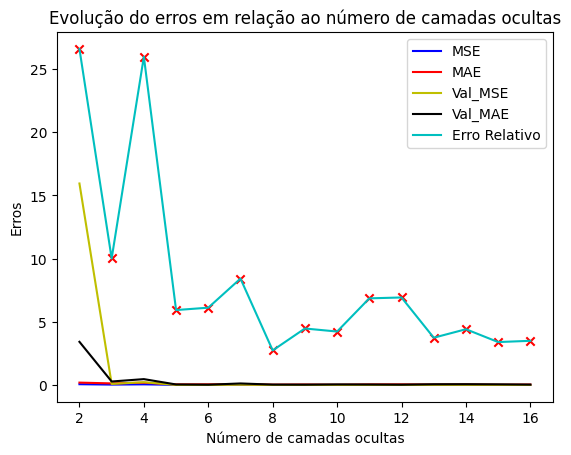

[26.598139490115194, 10.01085963603642, 25.982915107107385, 5.927107990213502, 6.114861382042451, 8.417240227794311, 2.732354758584106, 4.4669789958896775, 4.226024508260292, 6.854005093012658, 6.922897504586506, 3.737972053184102, 4.40936450264027, 3.3933551590566635, 3.492424547745666]


In [36]:
#Plotando o gra´fico com os erros

plt.plot(a, loss, c='b')
plt.plot(a, mae, c='r')
plt.plot(a, val_loss, c='y')
plt.plot(a, val_mae, c='k')
plt.plot(a, erro_relativo, c='c')
plt.scatter(a, erro_relativo, marker='x', c='r', label = 'Pontos')
plt.title('Evolução do erros em relação ao número de camadas ocultas')
plt.ylabel('Erros')
plt.xlabel('Número de camadas ocultas')
plt.legend(['MSE', 'MAE', 'Val_MSE', 'Val_MAE', 'Erro Relativo'])
plt.show()
print(erro_relativo)

In [37]:
#Sabendo que o erro fica menor em 10 camadas ocultas, o passo agora é definir uma função pra uma segunda rede neural, mas agora variando o numero de neuronios

def rede_neural2(x_treino, y_treino, x_teste, y_teste, nos):
  # Adicionar a camadas ocultas com 11 nós cada, de acordo com Su
  modelo = Sequential()
  for _ in range(10):
    modelo.add(Dense(units=nos, activation='relu', kernel_initializer = glorot_uniform(seed = 1), input_dim=x_treino.shape[1]))

  modelo.add(Dense(units=1, activation='linear'))

  # Treinando a rede neural:

  modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
  resultado = modelo.fit(x_treino, y_treino, epochs=350, batch_size=32, validation_data=(x_teste, y_teste))
  #Pegando os valores do erro
  loss = resultado.history['loss'][349]; val_loss = resultado.history['val_loss'][349]
  mae = resultado.history['mae'][349]; val_mae = resultado.history['val_mae'][349]

  y_pred = modelo.predict(x_treino)
  y_pred = pd.DataFrame(y_pred)

  erro_relativo = 0
  for i in range(len(y_treino)):
    erro_relativo += (np.abs(y_treino[i]- y_pred[0][i])/y_treino[i])
  erro_relativo = (erro_relativo/len(y_treino))


  return loss, val_loss, mae, val_mae, resultado, erro_relativo

In [38]:
#Analisando os valores dos erros
loss_n = []
val_loss_n = []
mae_n = []
val_mae_n = []
erro_relativo_n = []

n = []
for i in range (10, 70, 5):
  aux_loss, aux_val_loss, aux_mae, aux_val_mae, resultado, aux_erro_relativo = rede_neural2(x_treino, y_treino, x_teste, y_teste, i)
  loss_n.append(aux_loss)
  val_loss_n.append(aux_val_loss)
  mae_n.append(aux_mae)
  val_mae_n.append(aux_val_mae)
  erro_relativo_n.append(aux_erro_relativo)
  n.append(i)

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 83ms/step - loss: 0.0035 - mae: 0.0260 - val_loss: 0.0061 - val_mae: 0.0685
Epoch 306/350
1/1 [==============================] - 0s 67ms/step - loss: 0.0034 - mae: 0.0256 - val_loss: 0.0063 - val_mae: 0.0702
Epoch 307/350
1/1 [==============================] - 0s 70ms/step - loss: 0.0034 - mae: 0.0253 - val_loss: 0.0063 - val_mae: 0.0701
Epoch 308/350
1/1 [==============================] - 0s 73ms/step - loss: 0.0033 - mae: 0.0250 - val_loss: 0.0064 - val_mae: 0.0711
Epoch 309/350
1/1 [==============================] - 0s 77ms/step - loss: 0.0033 - mae: 0.0249 - val_loss: 0.0067 - val_mae: 0.0733
Epoch 310/350
1/1 [==============================] - 0s 77ms/step - loss: 0.0032 - mae: 0.0248 - val_loss: 0.0063 - val_mae: 0.0700
Epoch 311/350
1/1 [==============================] - 0s 80ms/step - loss: 0.0032 - mae: 0.0247 - val_loss: 0.0068 - val_mae: 0.0743
Epoch 312/350
1/1 [============

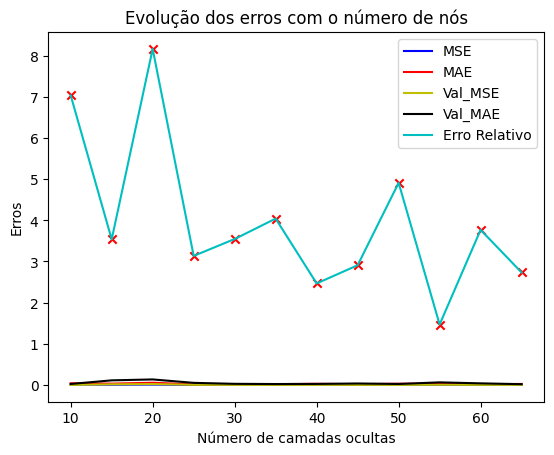

[7.035170861373032, 3.537160491540665, 8.164471072105574, 3.1349513667792492, 3.5455118108274073, 4.042054015212234, 2.466184678957075, 2.9082995953319997, 4.91115889107725, 1.4681177824706153, 3.768718160753635, 2.73204216332334]


In [39]:
plt.plot(n, loss_n, c='b')
plt.plot(n, mae_n, c='r')
plt.plot(n, val_loss_n, c='y')
plt.plot(n, val_mae_n, c='k')
plt.plot(n, erro_relativo_n, c='c')
plt.scatter(n, erro_relativo_n, marker='x', c='r', label = 'Pontos')
plt.title('Evolução dos erros com o número de nós')
plt.ylabel('Erros')
plt.xlabel('Número de camadas ocultas')
plt.legend(['MSE', 'MAE', 'Val_MSE', 'Val_MAE', 'Erro Relativo'])
plt.show()
print(erro_relativo_n)